# Learning From Data Homework #2

https://work.caltech.edu/homework/hw2.pdf

## Hoeffding Inequality

Run a computer simulation for flipping 1,000 virtual fair coins. Flip each coin independently 10 times. Focus on 3 coins as follows: c1 is the first coin flipped, crand is a
coin chosen randomly from the 1,000, and cmin is the coin which had the minimum
frequency of heads (pick the earlier one in case of a tie). Let ν1, νrand, and νmin be
the fraction of heads obtained for the 3 respective coins out of the 10 tosses.
Run the experiment 100,000 times in order to get a full distribution of ν1, νrand, and
νmin (note that crand and cmin will change from run to run).

1. The average value of νmin is closest to:  
[a] 0  
[b] **0.01** <---  
[c] 0.1  
[d] 0.5   
[e] 0.67  

2. Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding
Inequality?   
[a] c1 only  
[b] crand only  
[c] cmin only  
[d] **c1 and crand** <--  
[e] cmin and crand  

In [ ]:
import numpy as np

v1s = []
vrands = []
vmins = []

for i in range(100000):

    # 1 = heads, 0 = tails
    C = np.random.randint(0, 1+1, [1000, 10])

    c1 = C[0,:]
    crand = C[np.random.randint(0, 1000),:]
    cmin = C[np.argmin(np.sum(C, axis=1)),:]

    v1s.append(np.mean(c1))
    vrands.append(np.mean(crand))
    vmins.append(np.mean(cmin))


In [ ]:
plt.hist(v1s, bins=np.linspace(0, 10, 11)/10)
plt.title("v1 distribution")
plt.show()

plt.hist(vrands, bins=np.linspace(0, 10, 11)/10)
plt.title("vrand distribution")
plt.show()

plt.hist(vmins, bins=np.linspace(0, 10, 11)/10)
plt.title("vmin distribution")
plt.show()

print("Mean of vmin is ", np.mean(vmins))

## Error and Noise

Consider the bin model for a hypothesis h that makes an error with probability µ in
approximating a deterministic target function f (both h and f are binary functions).
If we use the same h to approximate a noisy version of f given by:

P(y | x) = λ y for f(x) and 1 − λ for y $\neq$ f(x)

3. What is the probability of error that h makes in approximating y? Hint: Two
wrongs can make a right!

[a] µ  
[b] λ  
[c] 1-µ  
[d] (1 − λ) ∗ µ + λ ∗ (1 − µ)  
[e] **(1 − λ) ∗ (1 − µ) + λ ∗ µ  ** <-- answer  



A) h(x) fails to approximate f(x). But y != f(x) due to noise. Same answer, so counts as correct.
B) h(x) = f(x). But y!= f(x) due to noise. Different answers, so incorrect.
C) h(x) != f(x), and y=f(x). Different answers, so incorrect.
D) h(x) = f(x), and y=f(x). Same answers, so correct.

Answer is sum of B) and C).

$$ P(B) + P(C) = (1 - \mu)(1-\lambda) + \mu\lambda $$

which is alternative [e]

4. At what value of λ will the performance of h be independent of µ?
[a] 0  
[b] 0.5  
[c] 1/√2  
[d] 1  
[e] No values of λ  

**Answer:** (alternative [b])

$$ P(h(x)=y) = \mu + \lambda(1-2\mu) $$

If we choose $\lambda=\frac12$ we get

$$ P(h(x)=y) = \frac12 $$

which is independent of $\mu$.

## Linear Regression

In these problems, we will explore how Linear Regression for classification works. As
with the Perceptron Learning Algorithm in Homework # 1, you will create your own
target function f and data set D. Take d = 2 so you can visualize the problem, and
assume X = [−1, 1] × [−1, 1] with uniform probability of picking each x ∈ X . In
each run, choose a random line in the plane as your target function f (do this by
taking two random, uniformly distributed points in [−1, 1] × [−1, 1] and taking the
line passing through them), where one side of the line maps to +1 and the other maps
to −1. Choose the inputs xn of the data set as random points (uniformly in X ), and
evaluate the target function on each xn to get the corresponding output yn.
5. Take N = 100. Use Linear Regression to find g and evaluate Ein, the fraction of
in-sample points which got classified incorrectly. Repeat the experiment 1000
times and take the average (keep the g’s as they will be used again in Problem
6). Which of the following values is closest to the average Ein? (Closest is the
option that makes the expression |your answer −given option| closest to 0. Use
this definition of closest here and throughout.)


In [93]:
import numpy as np
from matplotlib import pyplot as plt

d = 2

class Dataset:
    def __init__(self, N):
        self.X = 2*np.random.rand(N, d+1)-1
        self.X[:,0] = 1.0
        X = self.X
        xa = 2*np.random.rand() - 1
        ya = 2*np.random.rand() - 1
        xb = 2*np.random.rand() - 1
        yb = 2*np.random.rand() - 1
        xa, xb = min(xa, xb), max(xa, xb)
        self.xa = xa
        self.ya = ya
        self.xb = xb
        self.yb = yb
        self.a = (yb-ya)/(xb-xa)
        self.y = self.evaluate(X)
        
    def evaluate(self, X):
        return 2*(X[:,2] > self.ya + (X[:,1] - self.xa)*self.a)-1
        
    def plot(self, y=None):
        above = self.X[np.where(self.y < 0)]
        below = self.X[np.where(self.y >= 0)]
        plt.scatter(above[:,1], above[:,2], marker="x")
        plt.scatter(below[:,1], below[:,2], marker="o")
        if not y is None:
            wrong = np.where(y != self.y)
            plt.scatter(self.X[wrong,1], self.X[wrong,2], c="red")
        plt.plot([self.xa, self.xb], [self.ya, self.yb])
        plt.show()
        
        
def fit_ls(X, y):
    return np.linalg.solve(X.T@X, X.T@y)

def evaluate(X, w):
    return np.sign(X@w)

N = 100
gs = np.zeros([1000, N])

total_Ein = 0.0
for i in range(1000):
    ds = Dataset(N)
    w_ls = fit_ls(ds.X, ds.y)
    total_Ein += np.sum(evaluate(ds.X, w_ls) != ds.y)/N
    
print(total_Ein/1000)

0.039540000000000075


In [139]:
import numpy as np
import matplotlib.pyplot as plt

def generate_separable_data(N):
    X = 2*np.random.rand(N, 2+1)-1
    X[:,0] = 1.0
    xa = 2*np.random.rand() - 1
    ya = 2*np.random.rand() - 1
    xb = 2*np.random.rand() - 1
    yb = 2*np.random.rand() - 1
    xa, xb = min(xa, xb), max(xa, xb)
    xa = xa
    ya = ya
    xb = xb
    yb = yb
    a = (yb-ya)/(xb-xa)
    y = 2*(X[:,2] > ya + (X[:,1] - xa)*a)-1
    b = ya - xa*a
    return X, y, a, b

def plot_linearly_separable_data(X, y, f_intercept, f_slope, 
                                 g=None, g_intercept=None, g_slope=None):
    """
    X: data
    y: measured class
    f: true divider target function
    g: estimated divider function
    """
    plt.title("Linearly separable dataset")
    # Divide into classes
    above = np.where(y > 0)
    below = np.where(y <= 0)
    
    # Plot positive class
    plt.scatter(X[above,1], X[above,2], marker="o")
    
    # Plot misclassified
    if g is not None:
        misclassified = np.where(y != g)
        plt.scatter(X[misclassified,1], X[misclassified,2], marker=".", facecolor=None, s=50, c="black")
    
    # Plot negative class
    plt.scatter(X[below,1], X[below,2], marker="x")
    
    # Plot true target function
    plt.plot((-1, 1), (f_intercept-f_slope*1, f_intercept+f_slope*1))
    
    # Plot computed hypothesis function
    if g_intercept and g_slope:
        plt.plot((-2, 2), (g_intercept-2*g_slope, g_intercept+2*g_slope))
        
    plt.legend(["True target divider", "Estimate divider", "Positive class", "Misclassified", "Negative class",])
        
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.show()
    

class LinearRegressionBinaryClassifier:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.w = np.linalg.solve(X.T@X, X.T@y)
        self.intercept = -self.w[0]/self.w[2]
        self.slope = -self.w[1]/self.w[2]
    
    def predict(self, X):
        return np.sign(X@self.w)



A basic test of least squares binary classifier

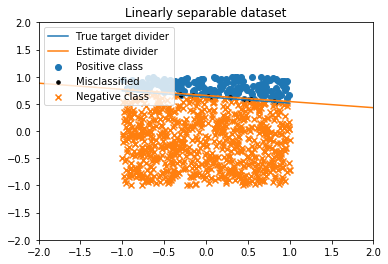

In [141]:
X, y, fa, fb = generate_separable_data(1000)
# 
ls_classifier = LinearRegressionBinaryClassifier()
ls_classifier.fit(X, y)
g = ls_classifier.predict(X)
plot_linearly_separable_data(X, y, fb, fa, g, ls_classifier.intercept, ls_classifier.slope)

It seems to get pretty close. Usually more correct the closer the target function is to the center.

# Problem 5
Take N = 100. Use Linear Regression to find g and evaluate Ein, the fraction of
in-sample points which got classified incorrectly. Repeat the experiment 1000
times and take the average (keep the g’s as they will be used again in Problem
6). Which of the following values is closest to the average Ein? 

We are asked to find the average in-sample error (defined as fraction of points that are misclassified) for thousand experiments with N=100.

In [148]:
E_ins = []

for i in range(1000):
    # Generate data + true target function
    X, y, fa, fb = generate_separable_data(100)

    # Create a classifier based on least squares linear regression
    ls_classifier = LinearRegressionBinaryClassifier()
    ls_classifier.fit(X, y)

    # Find in-sample error
    yhat = ls_classifier.predict(X)
    E_in = np.mean(yhat != y)
    E_ins.append(E_in)
    
print("Mean in sample error for N=100 is", np.mean(E_ins))

Mean in sample error for N=100 is 0.04002000000000001


**Answer: Around 0.038, alternative C**

# Problem 6
Now, generate 1000 fresh points and use them to estimate the out-of-sample
error Eout of g that you got in Problem 5 (number of misclassified out-of-sample
points / total number of out-of-sample points). Again, run the experiment 1000
times and take the average. Which value is closest to the average Eout?


----
Repeating the logic from problem 5, but this time generating 1100 points. Using 100 of them for linear regression, and then computing E_out using the hypothesis and the remaining 1000 points.

In [169]:
E_ins = []
E_outs = []

for i in range(1000):
    # Generate data + true target function
    X, y, fa, fb = generate_separable_data(1000)
    Xsample, ysample = X[0:100,:], y[0:100]
    Xremaining, yremaining = X[100:,:], y[100:]

    # Create a classifier based on least squares linear regression
    # using only sample
    ls_classifier = LinearRegressionBinaryClassifier()
    ls_classifier.fit(Xsample, ysample)

    # Find out of sample error
    yhat = ls_classifier.predict(Xremaining)
    E_out = np.mean(yhat != yremaining)
    E_outs.append(E_out)
    
    # Find in sample error
    yhat = ls_classifier.predict(Xsample)
    E_in = np.mean(yhat != ysample)
    E_ins.append(E_in)
    
print("Mean out of sample error for N=100 is", np.mean(E_outs))
print("Mean in sample error for N=100 is", np.mean(E_ins))
print("Ratio E_in/E_out is", np.mean(E_ins)/np.mean(E_outs))
print("Ratio E_out/E_in is", np.mean(E_outs)/np.mean(E_ins))

Mean out of sample error for N=100 is 0.047362222222222215
Mean in sample error for N=100 is 0.03839
Ratio E_in/E_out is 0.810561629052691
Ratio E_out/E_in is 1.2337124829961503


The closest value to one of the alternatives is E_out = 0.01. But just barely. 0.1 is just as valid. So **alternative c** or alternately **alternative d**.

## Problem 7

Now, take N = 10. After finding the weights using Linear Regression, use
them as a vector of initial weights for the Perceptron Learning Algorithm. Run
PLA until it converges to a final vector of weights that completely separates
all the in-sample points. Among the choices below, what is the closest value to
the average number of iterations (over 1000 runs) that PLA takes to converge?
(When implementing PLA, have the algorithm choose a point randomly from
the set of misclassified points at each iteration)

Need to implement PLA again. Will be interesting to see what effect good starting weights will have on the number of iterations.

In [247]:

class PerceptronBinaryClassifier:
    def __init__(self):
        self.w = np.zeros((X.shape[1],1))
    
    def fit(self, X, y, initial_weights=None):
        self.w = np.zeros((X.shape[1],1))
        if not initial_weights is None:
            self.w = initial_weights
        
        self.iter = 0
        while True:
            yhat = self.predict(X)
            misclassifieds = np.nonzero(y != yhat)[0]
            if len(misclassifieds) == 0:
                return
            i = np.random.choice(misclassifieds)
            self.w = self.w + y[i]*X[i,:]
            self.iter += 1
            if self.iter > 1000:
                print("Couldn't PLA")
                return
            
    def predict(self, X):
        return np.sign(X @ self.w)
    
iters = []
for i in range(1000):
    # Generate data + true target function
    X, y, fa, fb = generate_separable_data(10)

    # Create a classifier based on least squares linear regression
    ls_classifier = LinearRegressionBinaryClassifier()
    ls_classifier.fit(X, y)
    
    # Create a PLA classifier
    pla = PerceptronBinaryClassifier()
    pla.fit(X, y, initial_weights=ls_classifier.w)
    iters.append(pla.iter)
    
print("Mean iterations to converge when using LS estimated weights:", np.mean(iters))

Mean iterations to converge when using LS estimated weights: 4.767


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: RuntimeWarning: divide by zero encountered in double_scalars
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: RuntimeWarning: invalid value encountered in double_scalars


Closest answer is **Alternative A, 5**

Also noticed that PLA without LS weights used more than 1000 iterations.
Using LS initial weights speeds up the algorithm greatly.

## Nonlinear transformation

In these problems, we again apply Linear Regression for classification. Consider the
target function:
    
f(x1, x2) = sign(x1^2 + x2^2-0.6)

Generate a training set of N = 1000 points on X = [−1, 1] × [−1, 1] with a uniform
probability of picking each x ∈ X . Generate simulated noise by flipping the sign of
the output in a randomly selected 10% subset of the generated training set.

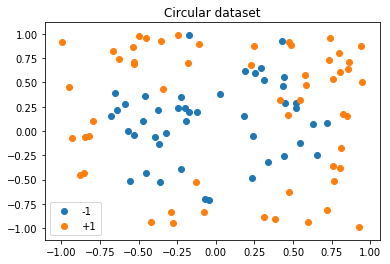

In [271]:
def f(x):
    return np.sign(x[:,1]**2 + x[:,2]**2 - 0.6)

def generate_dataset(N):
    X = np.random.uniform(-1, 1, (N,3))
    X[:,0] = 1.0
    y = f(X)
    
    # Flip 10% to simulate noise
    i_flip = np.arange(0, N)
    np.random.shuffle(i_flip)
    i_flip = i_flip[0:(N//10)]
    y[i_flip] *= -1
    
    return X, y

X, y = generate_dataset(100)
i_above = np.where(y >= 0)
i_below = np.where(y < 0)
plt.title("Circular dataset")
plt.scatter(X[i_below,1], X[i_below,2])
plt.scatter(X[i_above,1], X[i_above,2])
plt.legend(["-1", "+1"])
plt.show()

## Problem 8

Carry out Linear Regression without transformation, i.e., with feature vector:
(1, x1, x2),
to find the weight w. What is the closest value to the classification in-sample
error Ein? (Run the experiment 1000 times and take the average Ein to reduce
variation in your results.)

In [280]:
E_ins = []
for i in range(1000):
    X, y = generate_dataset(100)
    lsr = LinearRegressionBinaryClassifier()
    lsr.fit(X, y)
    yhat = lsr.predict(X)
    E_ins.append(np.mean(y != yhat))
    
print("Mean error rate: ", np.mean(E_ins))

Mean error rate:  0.44110000000000005


The bad fit is due to the fact that fitting a line through circular distribution is not a very good idea. Only a little better than random (0.5). Alternative D.

## Problem 9

Now, transform the N = 1000 training data into the following nonlinear feature
vector:

(1, x1, x2, x1x2, x1^2, x2^2)

Find the vector ˜w that corresponds to the solution of Linear Regression. Which
of the following hypotheses is closest to the one you find? Closest here means
agrees the most with your hypothesis (has the highest probability of agreeing on
a randomly selected point). Average over a few runs to make sure your answer
is stable.

In [299]:
def transform(X):
    Z = np.zeros((X.shape[0], 6))
    Z[:,0] = 1.0
    Z[:,1] = X[:,1]
    Z[:,2] = X[:,2]
    Z[:,3] = X[:,1] * X[:,2]
    Z[:,4] = X[:,1]**2
    Z[:,5] = X[:,2]**2
    return Z

X, y = generate_dataset(1000)
Z = transform(X)
lsr = LinearRegressionBinaryClassifier()
lsr.fit(Z, y)
w_tilde = lsr.w
print(w_tilde)


[-0.97852093  0.03935     0.03948636 -0.04498778  1.61689895  1.51218494]


Output weights are most similar to alternative A, g(x1, x2) = sign(−1 − 0.05x1 + 0.08x2 + 0.13x1x2 + 1.5x
2
1 + 1.5x
2
2
)

And some plotting to get a feel for the result

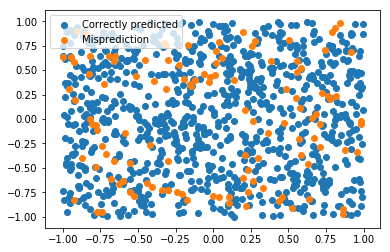

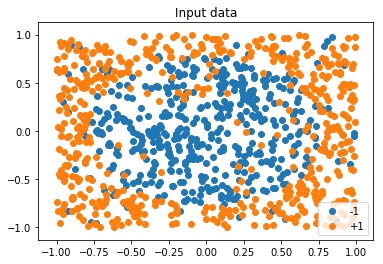

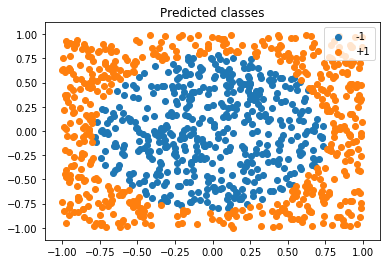

In [300]:
yhat = lsr.predict(Z)
correct = np.where(y == yhat)
wrong = np.where(y != yhat)
plt.scatter(X[correct,1], X[correct,2])
plt.scatter(X[wrong,1], X[wrong,2])
plt.legend(["Correctly predicted", "Misprediction"])
plt.show()

below = np.where(y < 0)
above = np.where(y >= 0)
plt.scatter(X[below,1], X[below,2])
plt.scatter(X[above,1], X[above,2])
plt.legend(["-1", "+1"])
plt.title("Input data")
plt.show()

below = np.where(yhat < 0)
above = np.where(yhat >= 0)
plt.scatter(X[below,1], X[below,2])
plt.scatter(X[above,1], X[above,2])
plt.legend(["-1", "+1"])
plt.title("Predicted classes")
plt.show()



## Problem 10
What is the closest value to the classification out-of-sample error Eout of your
hypothesis from Problem 9? (Estimate it by generating a new set of 1000 points
and adding noise, as before. Average over 1000 runs to reduce the variation in
your results.)

In [332]:
E_outs = []

for i in range(1000):
    X_all, y_all = generate_dataset(2000)

    X_train, y_train = X_all[:1000,:], y_all[0:1000]
    X_test, y_test = X_all[1000:,:], y_all[1000:]

    Z_train = transform(X_train)
    Z_test = transform(X_test)

    lsr = LinearRegressionBinaryClassifier()
    lsr.fit(Z_train, y_train)

    y_predicted = lsr.predict(Z_test)
    E_out = np.mean(y_test != y_predicted)
    E_outs.append(E_out)
    
print("Mean out of sample error is:", np.mean(E_outs))

Mean out of sample error is: 0.125726


Answer is closest to alternative B, 0.1.